In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

In [3]:
X=pd.read_csv('/content/drive/MyDrive/bigdata_pj-20221212T104521Z-001/bigdata_pj/all_poi.csv')

In [4]:
X[['ICAO','latitude','longitude']]

,ICAO,latitude,longitude
0,KABI,32.411,-99.682
1,KACK,41.253,-70.060
2,KACT,31.611,-97.230
3,KACY,39.458,-74.577
4,KAEX,31.327,-92.548
...,...,...,...
209,TISX,17.702,-64.798
210,TJBQ,18.495,-67.129
211,TJIG,18.457,-66.098
212,TJPS,18.008,-66.563


In [6]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X[['latitude','longitude']])

In [7]:
labels=clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,
        1,  3,  0, -1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  4,  3, -1,  0,  0,  0,  0,  0,  4,  0,  0,  5,  0,  3,
        0,  0,  0,  0,  0,  2,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        6,  5,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,
        0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  2,  0,  3,  0,  0,  3,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  5,  0,  0,  2,  0,
        0,  3,  2,  0,  0,  0,  0,  1,  0,  0,  7,  0,  0,  0,  0,  7,  2,
        4,  0,  0,  0,  0,  2,  0,  0,  0,  0,  2,  0,  0,  0,  0,  2,  1,
        2,  0,  2,  0, -1,  2,  2,  0,  3,  3,  0,  0,  0,  0,  0,  0,  7,
        0,  0,  0,  0,  0, -1, -1, -1,  8,  9, 10, -1, 10, -1, 10, 11,  9,
       -1, 10, 10, -1, -1, -1, 11, -1,  8, -1, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14])

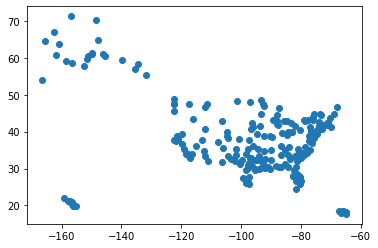

In [15]:
import matplotlib.pyplot as plt
Y=X[(X['longitude']<0)&(X['latitude']>0)][['longitude','latitude']]
plt.scatter(Y['longitude'],Y['latitude'])
plt.show()

In [27]:
clustering = DBSCAN(eps=2, min_samples=2).fit(Y[['latitude','longitude']])
labels=clustering.labels_

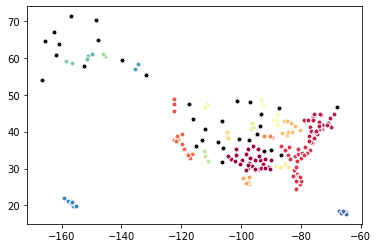

In [28]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = Y[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor='w',
        markersize=5,
    )

    xy = Y[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor='w',
        markersize=5,
    )

# plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()